# Task 2: PyTorch versions of the MLP architecture

Student: THA Sreyny
SID: 12113053

In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
# Set the random seeds for reproducibility
np.random.seed(0)

def plot_data(x_train, x_test, y_train, y_test):

    # Create a figure with 1 row and 2 columns for subplots
    _, ax = plt.subplots(1, 2, figsize=(7.5, 3))
    
    # Plotting the training set in the first subplot
    # Class 0 points
    ax[0].scatter(x_train[y_train[:, 0] == 1][:, 0], x_train[y_train[:, 0] == 1][:, 1], 
                  c='red', label='Class 0')
    # Class 1 points
    ax[0].scatter(x_train[y_train[:, 1] == 1][:, 0], x_train[y_train[:, 1] == 1][:, 1], 
                  c='blue', label='Class 1')
    ax[0].set_title('Training Set')
    ax[0].legend()

    # Plotting the test set in the second subplot
    # Class 0 points
    ax[1].scatter(x_test[y_test[:, 0] == 1][:, 0], x_test[y_test[:, 0] == 1][:, 1], 
                  c='red', label='Class 0')
    # Class 1 points
    ax[1].scatter(x_test[y_test[:, 1] == 1][:, 0], x_test[y_test[:, 1] == 1][:, 1], 
                  c='blue', label='Class 1')
    ax[1].set_title('Test Set')
    ax[1].legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

In [2]:
def plot_graph(training_loss, training_acc, testing_loss, test_acc, batch_size):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    # Plot accuracy vs. epoch
    axs[0].plot(training_loss, label='Training Loss')
    axs[0].plot(testing_loss, label='Test Loss')
    axs[0].set_title('Loss vs. Epoch (Batch Size: ' + str(batch_size) + ')')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    
    # Plot loss vs. epoch
    axs[1].plot(training_acc, label='Training Accuracy')
    axs[1].plot(test_acc, label='Test Accuracy')
    axs[1].set_title('Accuracy vs. Epoch (Batch Size: ' + str(batch_size) + ')')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()


# 1. Generate Dataset

## 1.1 Generate Circles dataset

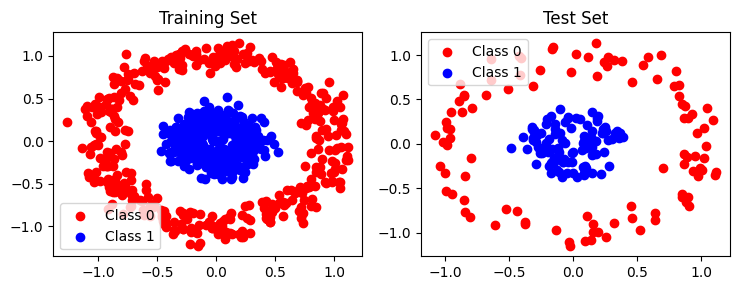

In [3]:
# Generate circular dataset
x, y = sklearn.datasets.make_circles(n_samples=1000,shuffle=True, noise=0.1,factor=0.25, random_state=42)
encoder = sklearn.preprocessing.OneHotEncoder()
# one-hot encoding on the labels
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.toarray()

# train test split
x_train_circ = x[:800]
x_test_circ = x[800:]

y_train_circ = y[:800]
y_test_circ = y[800:]

plot_data(x_train_circ, x_test_circ, y_train_circ, y_test_circ)

circles_dataset = {}
circles_dataset['x_train'] = x_train_circ
circles_dataset['x_test'] = x_test_circ
circles_dataset['y_train'] = y_train_circ
circles_dataset['y_test'] = y_test_circ


## 1.2 Generate blob dataset

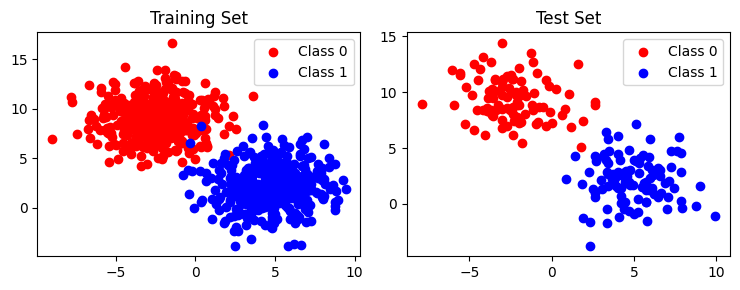

In [4]:
# Generate blob dataset
x, y = sklearn.datasets.make_blobs(n_samples=1000, centers=2, random_state=42, cluster_std=2)

# one-hot encoding on the labels
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.toarray()

# train test split
x_train_blob = x[:800]
x_test_blob = x[800:]

y_train_blob = y[:800]
y_test_blob = y[800:]

plot_data(x_train_blob, x_test_blob, y_train_blob, y_test_blob)

blobs_dataset = {}
blobs_dataset['x_train'] = x_train_blob
blobs_dataset['x_test'] = x_test_blob
blobs_dataset['y_train'] = y_train_blob
blobs_dataset['y_test'] = y_test_blob

# 2. Training and Test datasets

## 2.1 Training with circle datasets

In [5]:
from pytorch_mlp import MLP 
from pytorch_train_mlp import train
input_size = x_train_circ.shape[1]
hidden_sizes = [128]
output_size = y_train_circ.shape[1]

mlp_torch = MLP(input_size, hidden_sizes, output_size)

training_loss_circ, training_accuracy_circ,testing_loss_circ, testing_accuracy_circ = train(mlp_torch, x_train_circ, y_train_circ, x_test_circ, y_test_circ, epochs=1000, learning_rate=0.001, batch_size=1000)

Epoch 1, Loss: 0.6775, Accuracy: 0.4750, Val Loss: 0.6744, Val Accuracy: 0.6700
Epoch 2, Loss: 0.6737, Accuracy: 0.6575, Val Loss: 0.6709, Val Accuracy: 0.8850
Epoch 3, Loss: 0.6702, Accuracy: 0.9050, Val Loss: 0.6676, Val Accuracy: 0.8750
Epoch 4, Loss: 0.6667, Accuracy: 0.8888, Val Loss: 0.6643, Val Accuracy: 0.8650
Epoch 5, Loss: 0.6632, Accuracy: 0.8925, Val Loss: 0.6611, Val Accuracy: 0.8950
Epoch 6, Loss: 0.6597, Accuracy: 0.9087, Val Loss: 0.6578, Val Accuracy: 0.9150
Epoch 7, Loss: 0.6562, Accuracy: 0.9213, Val Loss: 0.6545, Val Accuracy: 0.9150
Epoch 8, Loss: 0.6527, Accuracy: 0.9437, Val Loss: 0.6513, Val Accuracy: 0.9250
Epoch 9, Loss: 0.6493, Accuracy: 0.9450, Val Loss: 0.6480, Val Accuracy: 0.9300
Epoch 10, Loss: 0.6458, Accuracy: 0.9513, Val Loss: 0.6447, Val Accuracy: 0.9350
Epoch 11, Loss: 0.6424, Accuracy: 0.9550, Val Loss: 0.6415, Val Accuracy: 0.9400
Epoch 12, Loss: 0.6390, Accuracy: 0.9563, Val Loss: 0.6382, Val Accuracy: 0.9400
Epoch 13, Loss: 0.6356, Accuracy: 0.9

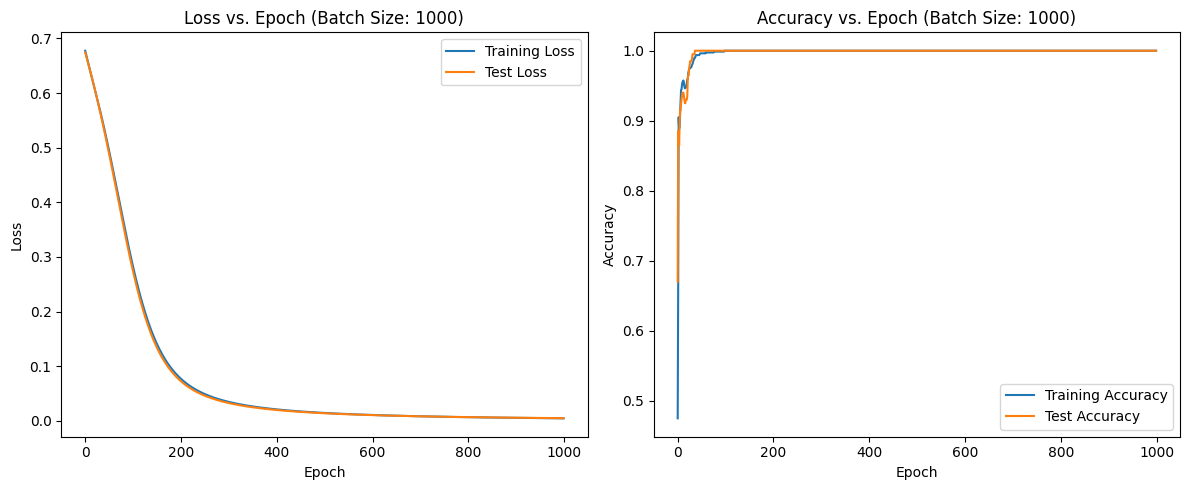

In [6]:
import numpy as np
training_accu = np.array(training_accuracy_circ)
testing_accu  = np.array(testing_accuracy_circ )
training_losses = np.array(training_loss_circ)
testing_losses = np.array(testing_loss_circ)
plot_graph(training_losses, training_accu, testing_losses, testing_accu, 1000)

## 2.2 Training with blob dataset


In [7]:
input_size = x_train_blob.shape[1]
hidden_sizes = [128]
output_size = y_train_blob.shape[1]

mlp_torch = MLP(input_size, hidden_sizes, output_size)

train_loss_bl, train_accu_bl, test_loss_bl, test_accu_bl = train(mlp_torch, x_train_blob, y_train_blob, x_test_blob, y_test_blob, epochs=1000, learning_rate=0.001, batch_size=1000)

Epoch 1, Loss: 0.6703, Accuracy: 0.5275, Val Loss: 0.5235, Val Accuracy: 0.7000
Epoch 2, Loss: 0.5332, Accuracy: 0.7125, Val Loss: 0.4148, Val Accuracy: 0.8550
Epoch 3, Loss: 0.4235, Accuracy: 0.8462, Val Loss: 0.3329, Val Accuracy: 0.9300
Epoch 4, Loss: 0.3406, Accuracy: 0.9263, Val Loss: 0.2739, Val Accuracy: 0.9550
Epoch 5, Loss: 0.2808, Accuracy: 0.9537, Val Loss: 0.2326, Val Accuracy: 0.9700
Epoch 6, Loss: 0.2392, Accuracy: 0.9750, Val Loss: 0.2038, Val Accuracy: 0.9800
Epoch 7, Loss: 0.2104, Accuracy: 0.9775, Val Loss: 0.1832, Val Accuracy: 0.9800
Epoch 8, Loss: 0.1901, Accuracy: 0.9762, Val Loss: 0.1676, Val Accuracy: 0.9750
Epoch 9, Loss: 0.1751, Accuracy: 0.9788, Val Loss: 0.1551, Val Accuracy: 0.9900
Epoch 10, Loss: 0.1633, Accuracy: 0.9762, Val Loss: 0.1444, Val Accuracy: 0.9900
Epoch 11, Loss: 0.1534, Accuracy: 0.9762, Val Loss: 0.1350, Val Accuracy: 0.9900
Epoch 12, Loss: 0.1447, Accuracy: 0.9762, Val Loss: 0.1263, Val Accuracy: 0.9900
Epoch 13, Loss: 0.1368, Accuracy: 0.9

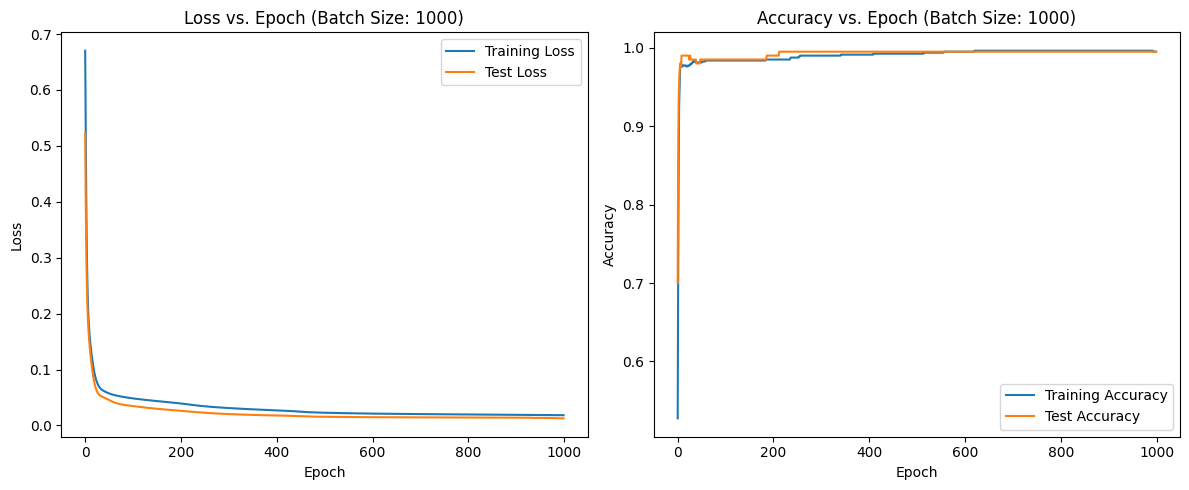

In [8]:
import numpy as np
training_accu_bl = np.array(train_accu_bl)
testing_accu_bl  = np.array(test_accu_bl)
training_losses_bl = np.array(train_loss_bl)
testing_losses_bl = np.array(test_loss_bl)

plot_graph(training_losses_bl, training_accu_bl, testing_losses_bl, testing_accu_bl,1000)

# 3. stochastic gradient descent

## 3.1 Training with circle dataset batch_size = 10000

In [9]:
from pytorch_train_mlp import train
train_loss_pc, train_accu_pc,test_loss_pc, test_accu_pc = train(mlp_torch, x_train_circ, y_train_circ, x_test_circ, y_test_circ, epochs=1000, learning_rate=0.001, batch_size=10000)

Epoch 1, Loss: 3.6166, Accuracy: 0.5012, Val Loss: 3.6961, Val Accuracy: 0.4950
Epoch 2, Loss: 3.5738, Accuracy: 0.5012, Val Loss: 3.6527, Val Accuracy: 0.4950
Epoch 3, Loss: 3.5311, Accuracy: 0.5012, Val Loss: 3.6094, Val Accuracy: 0.4950
Epoch 4, Loss: 3.4884, Accuracy: 0.5012, Val Loss: 3.5662, Val Accuracy: 0.4950
Epoch 5, Loss: 3.4458, Accuracy: 0.5012, Val Loss: 3.5230, Val Accuracy: 0.4950
Epoch 6, Loss: 3.4033, Accuracy: 0.5012, Val Loss: 3.4799, Val Accuracy: 0.4950
Epoch 7, Loss: 3.3609, Accuracy: 0.5012, Val Loss: 3.4369, Val Accuracy: 0.4950
Epoch 8, Loss: 3.3185, Accuracy: 0.5012, Val Loss: 3.3939, Val Accuracy: 0.4950
Epoch 9, Loss: 3.2762, Accuracy: 0.5012, Val Loss: 3.3510, Val Accuracy: 0.4950
Epoch 10, Loss: 3.2340, Accuracy: 0.5012, Val Loss: 3.3081, Val Accuracy: 0.4950
Epoch 11, Loss: 3.1918, Accuracy: 0.5012, Val Loss: 3.2653, Val Accuracy: 0.4950
Epoch 12, Loss: 3.1497, Accuracy: 0.5012, Val Loss: 3.2226, Val Accuracy: 0.4950
Epoch 13, Loss: 3.1076, Accuracy: 0.5

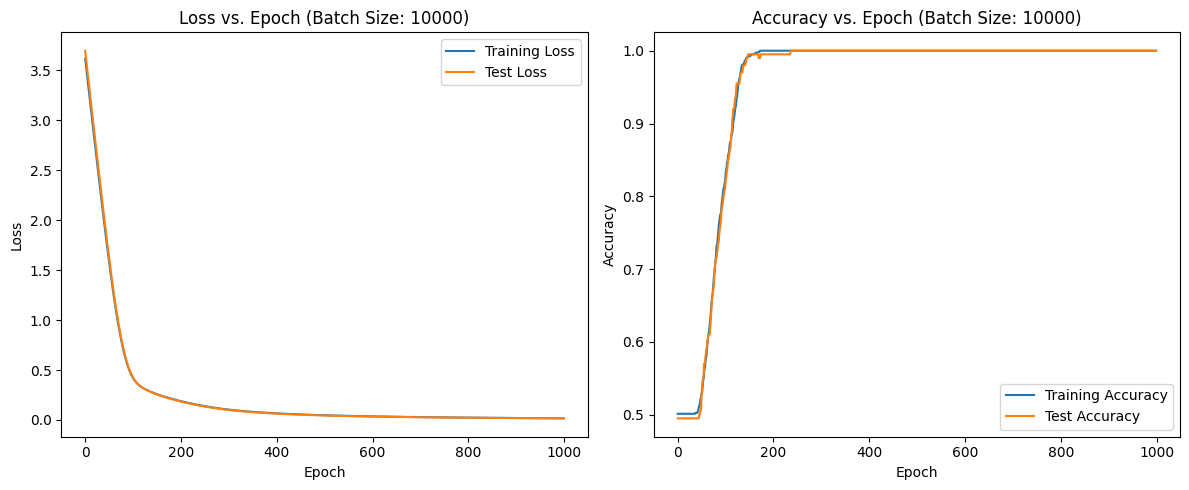

In [10]:
training_accuracy_pc = np.array(train_accu_pc)
testing_accuracy_pc  = np.array(test_accu_pc )
training_loss_pc = np.array(train_loss_pc)
testing_loss_pc = np.array(test_loss_pc)

plot_graph(training_loss_pc, training_accuracy_pc, testing_loss_pc, testing_accuracy_pc, 10000)

## 3.2 Training with blob dataset batch_size = 10000

In [11]:
from pytorch_train_mlp import train
train_loss_blob, train_accu_blob,test_loss_blob, test_accu_blob = train(mlp_torch, x_train_blob, y_train_blob, x_test_blob, y_test_blob, epochs=1000, learning_rate=0.001, batch_size=10000)

Epoch 1, Loss: 36.5258, Accuracy: 0.5062, Val Loss: 38.9641, Val Accuracy: 0.4800
Epoch 2, Loss: 36.2261, Accuracy: 0.5075, Val Loss: 38.6423, Val Accuracy: 0.4800
Epoch 3, Loss: 35.9269, Accuracy: 0.5075, Val Loss: 38.3212, Val Accuracy: 0.4800
Epoch 4, Loss: 35.6282, Accuracy: 0.5075, Val Loss: 38.0005, Val Accuracy: 0.4800
Epoch 5, Loss: 35.3301, Accuracy: 0.5075, Val Loss: 37.6803, Val Accuracy: 0.4800
Epoch 6, Loss: 35.0325, Accuracy: 0.5075, Val Loss: 37.3607, Val Accuracy: 0.4800
Epoch 7, Loss: 34.7354, Accuracy: 0.5075, Val Loss: 37.0415, Val Accuracy: 0.4800
Epoch 8, Loss: 34.4387, Accuracy: 0.5075, Val Loss: 36.7228, Val Accuracy: 0.4800
Epoch 9, Loss: 34.1426, Accuracy: 0.5075, Val Loss: 36.4048, Val Accuracy: 0.4800
Epoch 10, Loss: 33.8469, Accuracy: 0.5075, Val Loss: 36.0873, Val Accuracy: 0.4800
Epoch 11, Loss: 33.5517, Accuracy: 0.5075, Val Loss: 35.7703, Val Accuracy: 0.4800
Epoch 12, Loss: 33.2570, Accuracy: 0.5075, Val Loss: 35.4537, Val Accuracy: 0.4800
Epoch 13, Los

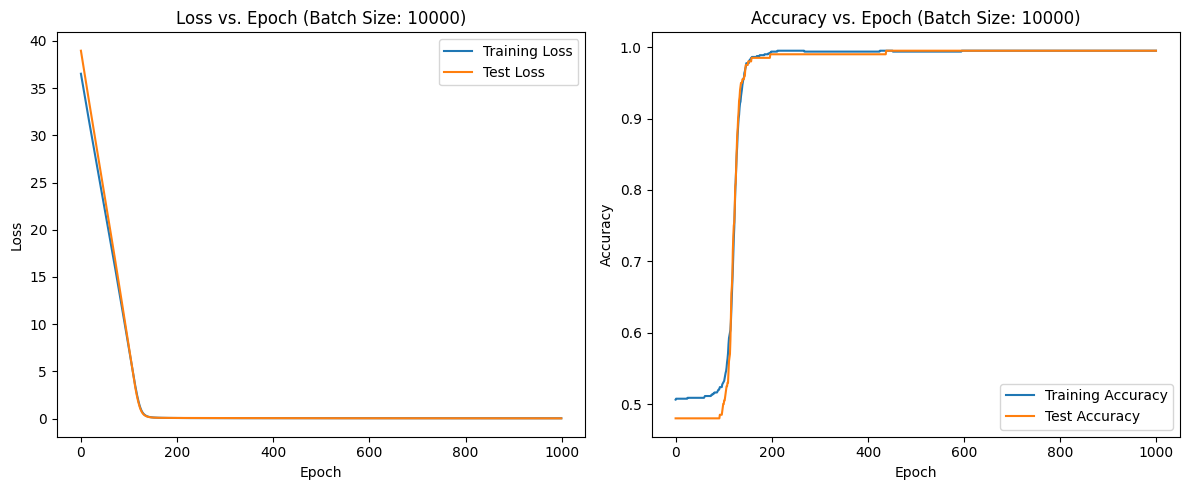

In [12]:
training_accuracy_blob = np.array(train_accu_blob)
testing_accuracy_blob  = np.array(test_accu_blob )
training_loss_blob = np.array(train_loss_blob)
testing_loss_blob = np.array(test_loss_blob)

plot_graph(training_loss_blob, training_accuracy_blob, testing_loss_blob, testing_accuracy_blob, 10000)

# Task3: Using torchvision.datasets.CIFAR10

## A. download data

Using **torchvision.datasets.CIFAR10** load the CIFAR10 dataset. Using PyTorch and the units, optimisation methods, regularisation methods, etc., studied in these weeks, try to obtain the highest accuracy you can on this dataset. Whenever possible use validation sets, but don’t worry too much about it at this stage. You’re free to implement your architecture in a separate .py file, but you should use a jupyter notebook to run the experiments, illustrate them, and comment on the results.

In [13]:
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5,0.5))
])

In [15]:
trainset = torchvision.datasets.CIFAR10(root ='./data', train = True, download=True, transform = transform)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download= True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers= 2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

## B. Explore the data

In [17]:
print(f'Training set size: {len(trainset)}')
print(f'Test set size: {len(testset)}')

Training set size: 50000
Test set size: 10000


In [18]:
# Check the size of a single image
image, label = trainset[0]  # Get the first sample in the training set
print(f'Image size: {image.size()}')  # Image is a tensor with shape (C, H, W)
print(f'Label: {label}')  # Class label (integer)

Image size: torch.Size([3, 32, 32])
Label: 6


In [19]:
print(image)
print(label)

tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
         [-0.8431, -1.0000, -1.0000,  ..., -0

Number of batches in trainloader: 782
Shape of images batch: torch.Size([64, 3, 32, 32])
Shape of labels batch: torch.Size([64])
Labels: tensor([3, 9, 1, 0, 7, 0, 9, 6, 2, 6, 8, 8, 4, 7, 2, 0, 4, 9, 3, 1, 5, 0, 1, 6,
        7, 1, 4, 7, 5, 7, 8, 3, 4, 0, 5, 1, 4, 6, 4, 6, 0, 2, 8, 8, 9, 0, 9, 9,
        3, 6, 7, 8, 2, 1, 7, 2, 0, 0, 7, 0, 8, 7, 1, 8])


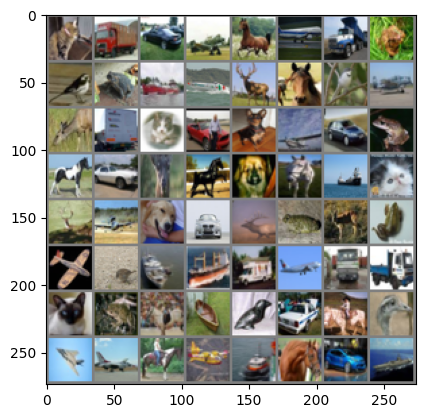

Labels for the first images: ['cat', 'truck', 'automobile', 'airplane', 'horse', 'airplane', 'truck', 'frog', 'bird', 'frog', 'ship', 'ship', 'deer', 'horse', 'bird', 'airplane', 'deer', 'truck', 'cat', 'automobile', 'dog', 'airplane', 'automobile', 'frog', 'horse', 'automobile', 'deer', 'horse', 'dog', 'horse', 'ship', 'cat', 'deer', 'airplane', 'dog', 'automobile', 'deer', 'frog', 'deer', 'frog', 'airplane', 'bird', 'ship', 'ship', 'truck', 'airplane', 'truck', 'truck', 'cat', 'frog', 'horse', 'ship', 'bird', 'automobile', 'horse', 'bird', 'airplane', 'airplane', 'horse', 'airplane', 'ship', 'horse', 'automobile', 'ship']


In [20]:
# 1. Number of batches in the DataLoader
num_batches = len(trainloader)
print(f"Number of batches in trainloader: {num_batches}")

# 2. Inspect a single batch of data
data_iter = iter(trainloader)
images, labels = next(data_iter)

print(f"Shape of images batch: {images.shape}")
print(f"Shape of labels batch: {labels.shape}")
print(f"Labels: {labels}")

# 3. Visualize the first 8 images in the batch
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image (inverse of the transform normalization)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert from (C, H, W) to (H, W, C)
    plt.show()

# Display 8 images from the batch
imshow(torchvision.utils.make_grid(images[:,]))  # Display the first 8 images

# Optionally, can print out the class labels of the displayed images
classes = trainset.classes  # List of class names
labels = [classes[label] for label in labels[:,]]
print(f"Labels for the first images: {labels}")

## C Training dataset


In [21]:
from pytorch_train_mlp_cifar10  import Model
from pytorch_train_mlp_cifar10 import train

In [22]:
input_size = 3 * 32 * 32
hidden_sizes = [128,64]
output_size = 10

mlp_torch = Model(input_size, hidden_sizes, output_size)

train_loss, train_accu, test_loss, test_accu = train(mlp_torch, trainloader, testloader, 0.01, 100)

Epoch 1, Loss: 1.7222, Accuracy: 0.3898, Val Loss: 1.5394, Val Accuracy: 0.4624
Epoch 2, Loss: 1.4844, Accuracy: 0.4737, Val Loss: 1.4474, Val Accuracy: 0.4870
Epoch 3, Loss: 1.3786, Accuracy: 0.5120, Val Loss: 1.3984, Val Accuracy: 0.5059
Epoch 4, Loss: 1.3127, Accuracy: 0.5366, Val Loss: 1.3904, Val Accuracy: 0.5095
Epoch 5, Loss: 1.2508, Accuracy: 0.5589, Val Loss: 1.3629, Val Accuracy: 0.5193
Epoch 6, Loss: 1.2075, Accuracy: 0.5733, Val Loss: 1.3974, Val Accuracy: 0.5071
Epoch 7, Loss: 1.1696, Accuracy: 0.5872, Val Loss: 1.3895, Val Accuracy: 0.5162
Epoch 8, Loss: 1.1270, Accuracy: 0.5989, Val Loss: 1.3712, Val Accuracy: 0.5260
Epoch 9, Loss: 1.0905, Accuracy: 0.6126, Val Loss: 1.4038, Val Accuracy: 0.5204
Epoch 10, Loss: 1.0656, Accuracy: 0.6222, Val Loss: 1.3829, Val Accuracy: 0.5217
Epoch 11, Loss: 1.0284, Accuracy: 0.6326, Val Loss: 1.4167, Val Accuracy: 0.5109
Epoch 12, Loss: 1.0031, Accuracy: 0.6449, Val Loss: 1.4248, Val Accuracy: 0.5160
Epoch 13, Loss: 0.9741, Accuracy: 0.6

## D Plot the result

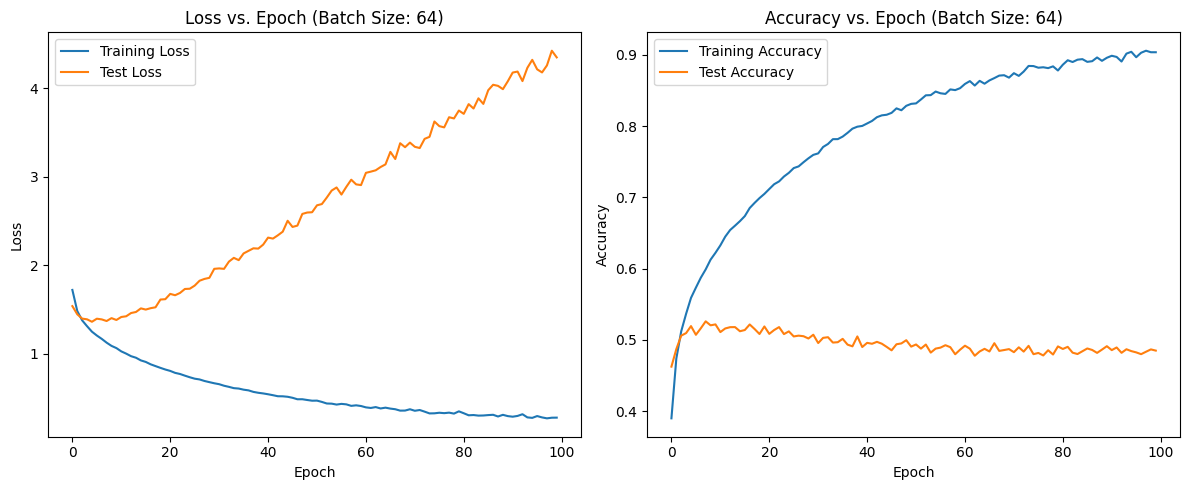

In [23]:
training_accuracy = np.array(train_accu)
testing_accuracy  = np.array(test_accu)
training_loss = np.array(train_loss)
testing_loss = np.array(test_loss)

plot_graph(training_loss, training_accuracy, testing_loss, testing_accuracy, 64)